# Simple EDA of Titanic dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/train.csv", sep=";")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
1,2,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
2,3,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
3,4,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S
4,5,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
5,6,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
6,7,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
7,8,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
8,9,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
9,10,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 12 columns):
PassengerId    802 non-null int64
Survived       802 non-null int64
Pclass         802 non-null int64
Name           802 non-null object
Sex            802 non-null object
Age            646 non-null float64
SibSp          802 non-null int64
Parch          802 non-null int64
Ticket         802 non-null object
Fare           802 non-null float64
Cabin          187 non-null object
Embarked       801 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 75.3+ KB


Removing unnecessary columns:

In [4]:
df = df.drop(["PassengerId", "Name", "Ticket", "Fare"], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,24.0,0,0,NaN,S
1,0,3,male,29.0,0,0,NaN,S
2,0,3,male,20.0,0,0,NaN,S
3,0,1,male,46.0,1,0,E31,S
4,0,3,male,26.0,1,2,NaN,S


Checking for percentage of null values:

In [5]:
df.isnull().mean()

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.194514
SibSp       0.000000
Parch       0.000000
Cabin       0.766833
Embarked    0.001247
dtype: float64

Since *Cabin* column contains over 75% of null values we can remove it as well as it doesn't give enought information.

In [6]:
df = df.drop(["Cabin"], axis=1)

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,802.000000,802.000000,646.000000,802.000000,802.000000
mean,0.377805,2.296758,30.075604,0.493766,0.374065
std,0.485141,0.838651,14.470148,1.084719,0.781960
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000
50%,0.000000,3.000000,29.000000,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


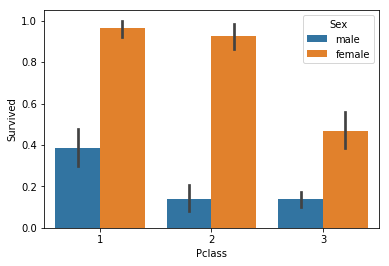

In [8]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)

In every class more women survived than men. Also significantly less people from the third class survived than from the first and second class.

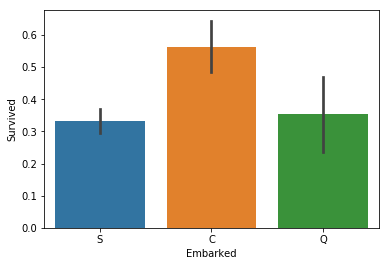

In [9]:
sns.barplot(x="Embarked", y="Survived", data=df)

More people survived who embarked in Cherbourg than people who embarked in Queenstown or Southampton.

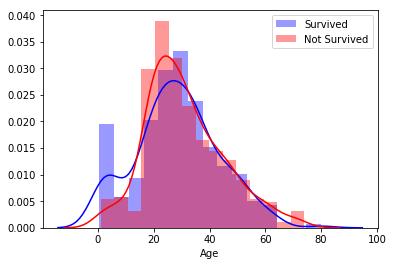

In [10]:
sns.distplot(df.loc[df["Survived"] == 1, "Age"], color="blue", label="Survived")
sns.distplot(df.loc[df["Survived"] == 0, "Age"], color="red", label="Not Survived")
plt.legend()

The distribution of age is similar amongst both groups. It's skewed towards the lower age.

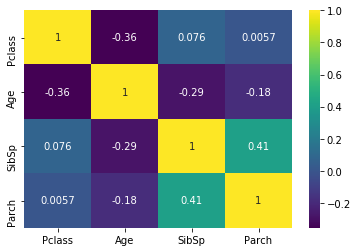

In [11]:
sns.heatmap(df.drop(["Survived"], axis=1).corr(), annot=True, cmap="viridis")

There is almost no linear correlation between the features. The highest correlation is between number of siblings and number of parents. We can later transform these features into one that counts total number of family members. 